# SML 310 - Project 3 - NLP and Neural Networks
Pranav Avva

In [13]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models

%matplotlib inline
sns.set()

## Problem 1 - NLP and Word2Vec

### Part A

**Please describe what is meant by a "vector embedding" of words in Word2Vec.**

### Part B

**Please use the pre-trained gensim `glove-wiki-gigaword-50` Word2Vec model to determine reasonable synonyms for the following words:**
1. **Tiger**
2. **Awesome**
3. **Song**
4. **Data**

### Part C

**Please use the pre-trained gensim `glove-wiki-gigaword-50` Word2Vec models to determine reasonable answers for the following analogies:**

1. **puppy : kitten :: dog : ?**
2. **freshman : sophomore :: junior : ?**
3. **brother : sister :: grandson : ?**

## Problem 2 - NLP and Topic Modeling

### Part A

**Please prepare the built-in “fake-news” corpus of text using the commands:**

```python
import gensim.downloader as api
corpus_data = api.load("fake-news")
docs = [x['text'] for x in corpus_data]
```

**From the Gensim GitHub at https://github.com/RaRe-Technologies/gensim-data.**

### Part B

**Please use Gensim to preprocess these documents by tokenizing and lemmatizing them and removing other small text/strings that you decide are not meaningful for NLP, as well as rare and scarce words.**

**You may find the following Gensim tutorial useful: https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html**

### Part C

**Please use the Gensim `Dictionary` and `dictionary.doc2bow` to create a dictionary and a bag of words representation of your tokenized corpus.**

### Part D

**Please use the Gensim `LDAModel` to perform topic modelling of the corpus into 3 topics.**

### Part E

**For each topic show the main words and use these to give a rough name to each topic.**

## Problem 3 - Data Classification

### Part A

**Please take the MNIST training dataset and split off the last 10,000 images as a validation data set. Then assign the other training images to a new training set.**

X_train shape: (50000, 28, 28)
y_train shape: (50000,)
X_valid shape: (10000, 28, 28)
y_valid shape: (10000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


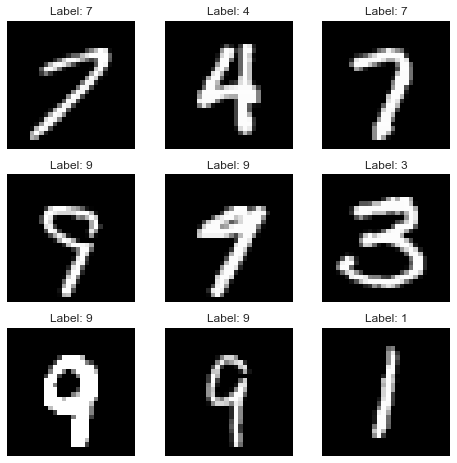

In [14]:
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# create train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=10000)

# print the shape of all sets with the set name
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# show some training images with their labels
fig, ax = plt.subplots(3, 3, figsize=(8, 8))
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(X_train[i * 5 + j], cmap='binary_r')
        ax[i, j].set_title(f"Label: {y_train[i * 5 + j]}")
        ax[i, j].axis('off')

### Part B

**Please create a Neural Network with three dense hidden layers each having 32 nodes, and train it to classify the MNIST Data set over five epochs. For this please use your new training set and validation set respectively for model training and model performance reporting.**

In [15]:
model = models.Sequential()

# create an input layer with 784 neurons
model.add(layers.Flatten(input_shape=(28, 28), name='input'))

# create 3 hidden dense layers with 32 neurons each
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# create an output layer with 10 neurons
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [16]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3825 - accuracy: 0.8847 - val_loss: 0.2088 - val_accuracy: 0.9383
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1717 - accuracy: 0.9480 - val_loss: 0.1592 - val_accuracy: 0.9491
Epoch 3/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1333 - accuracy: 0.9592 - val_loss: 0.1523 - val_accuracy: 0.9524
Epoch 4/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1122 - accuracy: 0.9651 - val_loss: 0.1248 - val_accuracy: 0.9604
Epoch 5/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0956 - accuracy: 0.9697 - val_loss: 0.1275 - val_accuracy: 0.9612


### Part C

**What is the performance of the model on the training and validation sets over the 5 epochs? Which of these do we expect is characteristic of model performance in new data?**

The model's accuracy, validation accuracy, loss, and validation loss are presented in the plot below. The trained model's accuracy on the 

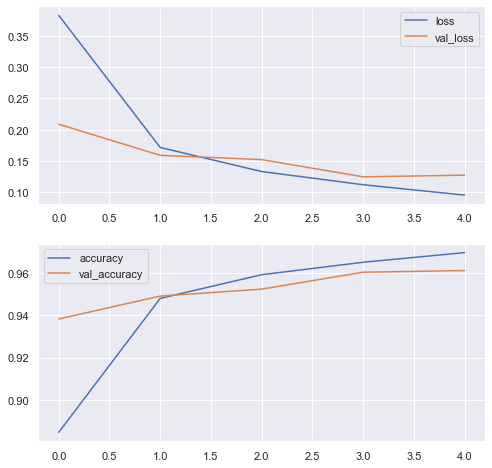

In [17]:
# plot loss, val_loss on one axis and accuracy, val_accuracy on the other
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(history.history['loss'], label='loss')
ax[0].plot(history.history['val_loss'], label='val_loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='accuracy')
ax[1].plot(history.history['val_accuracy'], label='val_accuracy')
ax[1].legend()

In [18]:
from sklearn.metrics import classification_report

y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

# print the classification report
print("Classification report for training set:")
print(classification_report(y_train, y_train_pred.argmax(axis=1)))

print("Classification report for validation set:")
print(classification_report(y_valid, y_valid_pred.argmax(axis=1)))

Classification report for training set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4941
           1       0.98      0.99      0.99      5623
           2       0.97      0.98      0.98      4949
           3       0.97      0.96      0.97      5117
           4       0.98      0.96      0.97      4869
           5       0.94      0.98      0.96      4476
           6       0.98      0.98      0.98      4922
           7       0.96      0.99      0.98      5249
           8       0.96      0.94      0.95      4902
           9       0.99      0.93      0.96      4952

    accuracy                           0.97     50000
   macro avg       0.97      0.97      0.97     50000
weighted avg       0.97      0.97      0.97     50000

Classification report for validation set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       982
           1       0.98      0.99      0.98      1

The following plot shows the confusion matrices for the training and validation sets. The main diagonal of the confusion matrix is removed to show where the errors lie, as the number of correct predictions far outnumbers incorrect predictions. There are a couple patterns in the confusion matrices of both the training and validation set:

* 5s and 8s are often confused for 3s
* 6s and 4s are often confused for 4s
* 8s are often confused for 1s and 3s
* 2s and 9s are often confused for 7s

The above patterns may not be present in the following heatmaps due to effects of randomization in the splitting of data and the neural network solver.

Text(0.5, 57.5, 'Predicted label')

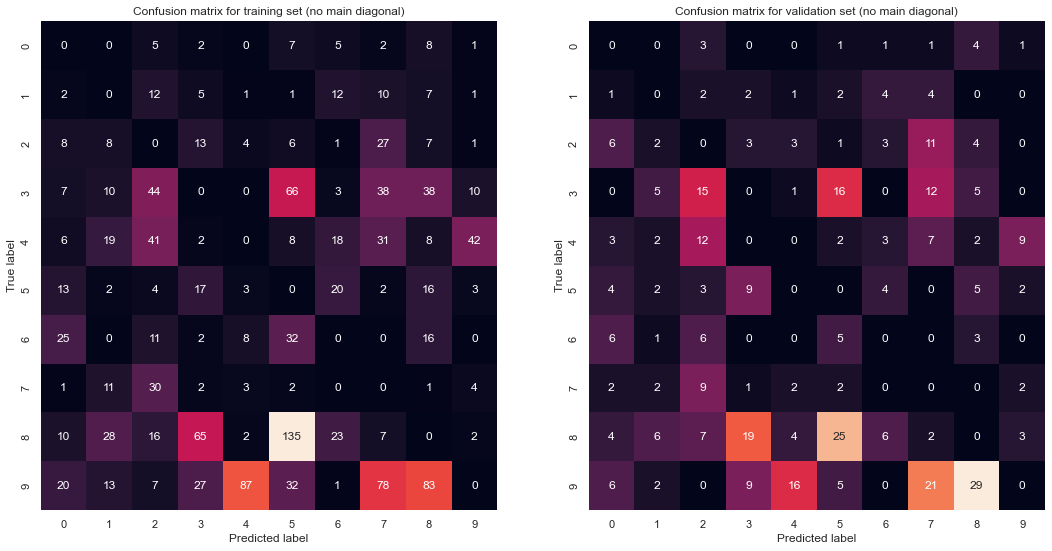

In [19]:
from sklearn.metrics import confusion_matrix

# confusion matrix with the main diagonal set to zero
train_confusion_matrix_no_diagonal = confusion_matrix(y_train, y_train_pred.argmax(axis=1)) - np.diag(np.diag(confusion_matrix(y_train, y_train_pred.argmax(axis=1))))
valid_confusion_matrix_no_diagonal = confusion_matrix(y_valid, y_valid_pred.argmax(axis=1)) - np.diag(np.diag(confusion_matrix(y_valid, y_valid_pred.argmax(axis=1))))

# imshow the confusion matrix for train and test sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

sns.heatmap(train_confusion_matrix_no_diagonal, annot=True, ax=ax1, fmt='d', cbar=False)
ax1.set_title('Confusion matrix for training set (no main diagonal)')
ax1.set_ylabel('True label')
ax1.set_xlabel('Predicted label')

sns.heatmap(valid_confusion_matrix_no_diagonal, annot=True, ax=ax2, fmt='d', cbar=False)
ax2.set_title('Confusion matrix for validation set (no main diagonal)')
ax2.set_ylabel('True label')
ax2.set_xlabel('Predicted label')

### Part D

**Check your model performance on the test set, and compare with your expectations in Part C.**

In [20]:
y_test_pred = model.predict(X_test)

print("Classification report for test set:")
print(classification_report(y_test, y_test_pred.argmax(axis=1)))

Classification report for test set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.97      0.95      0.96       982
           5       0.93      0.96      0.95       892
           6       0.96      0.97      0.96       958
           7       0.95      0.97      0.96      1028
           8       0.94      0.92      0.93       974
           9       0.98      0.91      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



Text(0.5, 57.5, 'Predicted label')

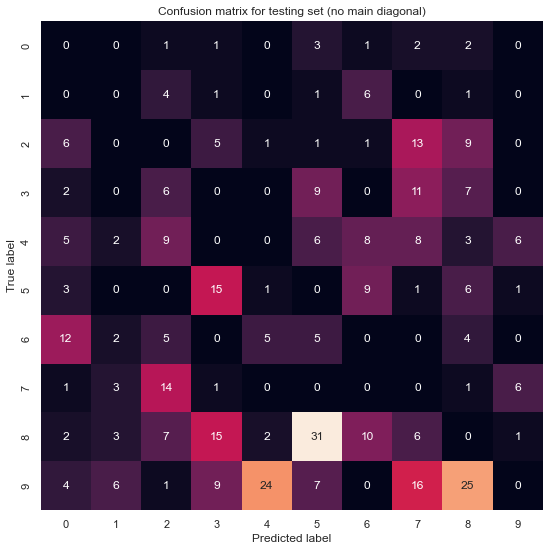

In [21]:
test_confusion_matrix_no_diagonal = confusion_matrix(y_test, y_test_pred.argmax(axis=1)) - np.diag(np.diag(confusion_matrix(y_test, y_test_pred.argmax(axis=1))))

fig, ax = plt.subplots(1, 1, figsize=(9, 9))

sns.heatmap(test_confusion_matrix_no_diagonal, annot=True, ax=ax, fmt='d', cbar=False)
ax.set_title('Confusion matrix for testing set (no main diagonal)')
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

There are similar patterns in the confusion matrix of the test set as well. The model's test performance is similar to the model's validation performance. With a consistent F1 score of above 0.95, the model is performing well for a simple feed-forward neural network with a shallow (low number of layers) and narrow (low number of nodes per layer) architecture.

It is likely possible to improve the model's performance by making the architecture more complicated and possibly including convolutional layers. Using a CNN architecture would allow the model to focus on the most important parts of the images

In [22]:
model2 = models.Sequential()

# use convolutional layers to create a CNN
# input is images of size 28x28 pixels
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

# flatten and add dense layers
model2.add(layers.Flatten())
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))

# add a dropout layer to prevent overfitting
model2.add(layers.Dropout(0.3))

# output layer
model2.add(layers.Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [23]:
# early stopping
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/50
1563/1563 [==============================] - 29s 18ms/step - loss: 0.3167 - accuracy: 0.9007 - val_loss: 0.0677 - val_accuracy: 0.9804
Epoch 2/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0915 - accuracy: 0.9754 - val_loss: 0.0686 - val_accuracy: 0.9810
Epoch 3/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0631 - accuracy: 0.9838 - val_loss: 0.0585 - val_accuracy: 0.9841
Epoch 4/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0508 - accuracy: 0.9865 - val_loss: 0.0504 - val_accuracy: 0.9867
Epoch 5/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0407 - accuracy: 0.9894 - val_loss: 0.0497 - val_accuracy: 0.9873
Epoch 6/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0352 - accuracy: 0.9909 - val_loss: 0.0412 - val_accuracy: 0.9899
Epoch 7/50
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0282 - accuracy: 0.9926 - val_loss: 0.0408 -

In [24]:
# predict against the validation set and print the classification report

y_valid_pred2 = model2.predict(X_valid)

print("Classification report for validation set:")
print(classification_report(y_valid, y_valid_pred2.argmax(axis=1)))

Classification report for validation set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       982
           1       0.99      0.99      0.99      1119
           2       0.99      0.99      0.99      1009
           3       0.99      1.00      0.99      1014
           4       0.99      0.99      0.99       973
           5       1.00      0.98      0.99       945
           6       0.98      1.00      0.99       996
           7       0.98      1.00      0.99      1016
           8       0.99      0.98      0.99       949
           9       0.99      0.98      0.98       997

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



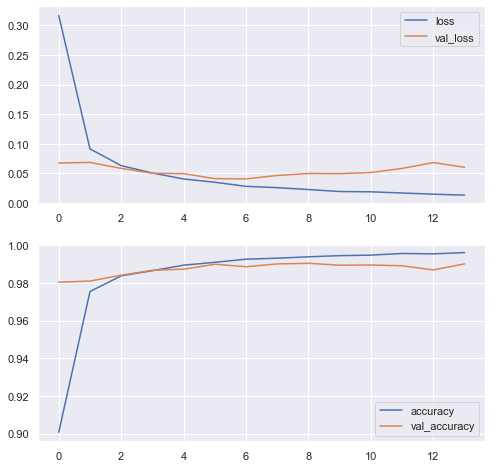

In [25]:
# plot loss, val_loss on one axis and accuracy, val_accuracy on the other
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(history2.history['loss'], label='loss')
ax[0].plot(history2.history['val_loss'], label='val_loss')
ax[0].legend()

ax[1].plot(history2.history['accuracy'], label='accuracy')
ax[1].plot(history2.history['val_accuracy'], label='val_accuracy')
ax[1].legend()

Text(0.5, 57.5, 'Predicted label')

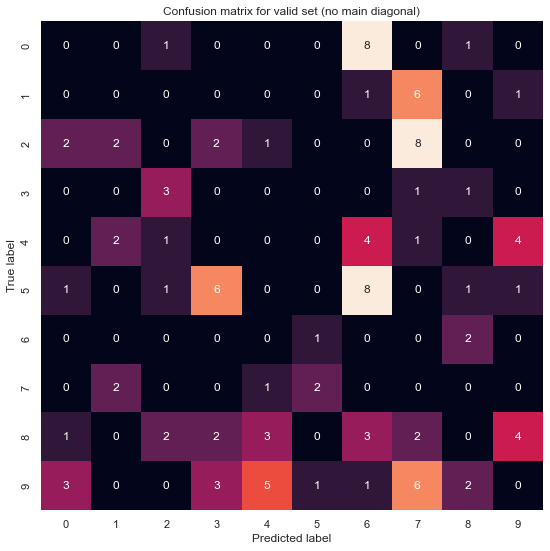

In [26]:
# plot the validation confusion matrix

valid_confusion_matrix_no_diagonal_2 = confusion_matrix(y_valid, y_valid_pred2.argmax(axis=1)) - np.diag(np.diag(confusion_matrix(y_valid, y_valid_pred2.argmax(axis=1))))

fig, ax = plt.subplots(1, 1, figsize=(9, 9))

sns.heatmap(valid_confusion_matrix_no_diagonal_2, annot=True, ax=ax, fmt='d', cbar=False)
ax.set_title('Confusion matrix for valid set (no main diagonal)')
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

In [27]:
# predict against the test set and print the classification report

y_test_pred2 = model2.predict(X_test)

print("Classification report for validation set:")
print(classification_report(y_test, y_test_pred2.argmax(axis=1)))

Classification report for validation set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(0.5, 57.5, 'Predicted label')

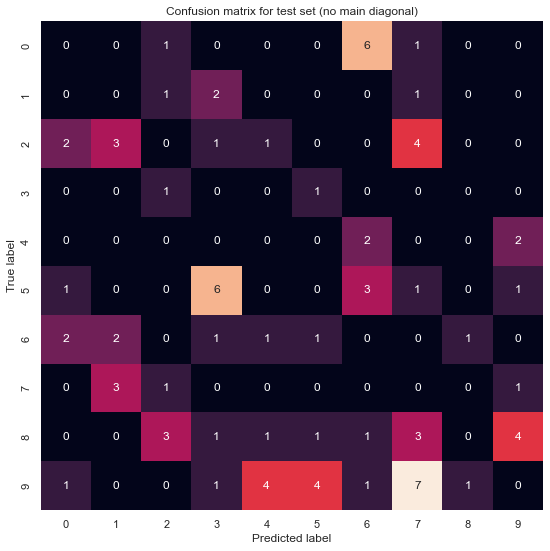

In [28]:
# plot the validation confusion matrix

test_confusion_matrix_no_diagonal_2 = confusion_matrix(y_test, y_test_pred2.argmax(axis=1)) - np.diag(np.diag(confusion_matrix(y_test, y_test_pred2.argmax(axis=1))))

fig, ax = plt.subplots(1, 1, figsize=(9, 9))

sns.heatmap(test_confusion_matrix_no_diagonal_2, annot=True, ax=ax, fmt='d', cbar=False)
ax.set_title('Confusion matrix for test set (no main diagonal)')
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

The convolutional neural network architecture has better performance than the FFNN architecture. The test F1 score is consistently above 0.98 in the CNN, compared to above 0.95 in the FFNN. Therefore, while more complicated and longer to train, the CNN setup yields better performance than a simpler and faster FFNN.